In [ ]:
from google.colab import files

uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
!unzip archive.zip -d extracted_folder/

Archive:  archive.zip
  inflating: extracted_folder/Titanic-Dataset.csv  


In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv("extracted_folder/Titanic-Dataset.csv")

# Show first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("extracted_folder/Titanic-Dataset.csv")

# Show info
print(df.info())

# Show missing values
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked    

In [ ]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop(columns=['Cabin'], inplace=True)


/tmp/ipython-input-3926664541.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3926664541.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# Safely fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin only if it exists
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])


In [ ]:
# Encode 'Sex' as 0 and 1
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' safely
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Columns to scale
num_cols = ['Age', 'Fare']

# Check that columns exist
for col in num_cols:
    if col in df.columns:
        df[[col]] = scaler.fit_transform(df[[col]])


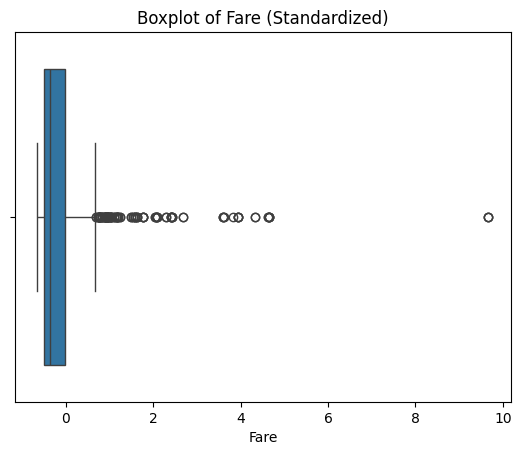

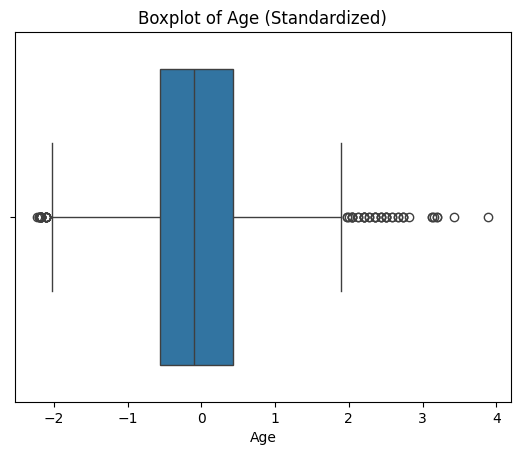

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize 'Fare' outliers
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare (Standardized)')
plt.show()

# Visualize 'Age' outliers
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age (Standardized)')
plt.show()


In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from Age and Fare
for col in ['Age', 'Fare']:
    if col in df.columns:
        df = remove_outliers_iqr(df, col)
